In [110]:
%matplotlib widget
import numpy as np
from disba import PhaseDispersion, GroupDispersion
import seaborn as sns
import matplotlib.pyplot as plt

# Velocity model
# thickness, Vp, Vs, density
# km, km/s, km/s, g/cm3
n_depths = 1000
vp, vs, rho = 7., 3.5, 2.
dz = 1.
velocity_model = np.c_[np.ones(n_depths)*dz, np.repeat([vp], n_depths), np.repeat([vs], n_depths), np.repeat([rho], n_depths)]

# Periods must be sorted starting with low periods
t = np.logspace(-1.0, 2.0, 3)
freq = 1./t

# Compute the 3 first Rayleigh- and Love- wave modal dispersion curves
# Fundamental mode corresponds to mode 0
pd = PhaseDispersion(*velocity_model.T)
cpr = pd(t, mode=0, wave="rayleigh")

gd = GroupDispersion(*velocity_model.T)
cgr = gd(t, mode=0, wave="rayleigh")

In [40]:
from disba import EigenFunction

eigf = EigenFunction(*velocity_model.T)
eigr = eigf(20.0, mode=0, wave="rayleigh")

In [121]:
r = 100.
Mxx = 1.
Myy = 1.
Mzz = 1.
Mxy = 0.
Mxz = 0.
Myx = 0.
Myz = 0.
Mzx = 0.
Mzy = 0.
dt = 1e-2
time = np.arange(0., 100., dt)
phi = np.radians(0.)
stf = np.exp(-((time-10.)/0.2)**2)
#stf = np.gradient(stf, dt)

/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


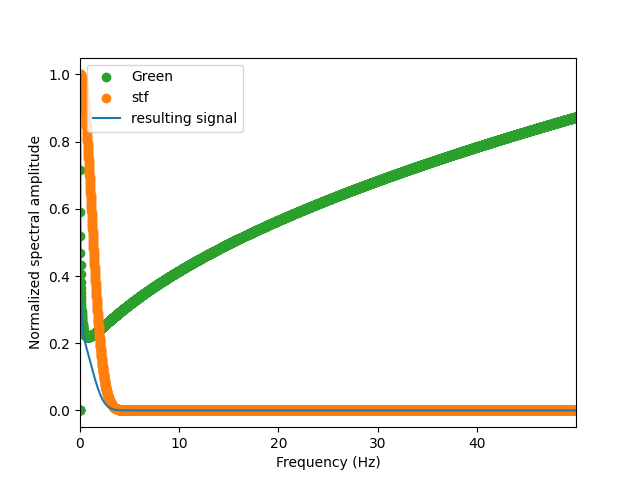

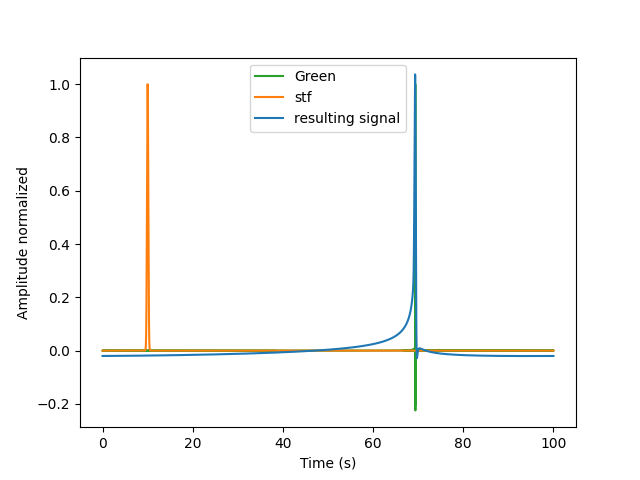

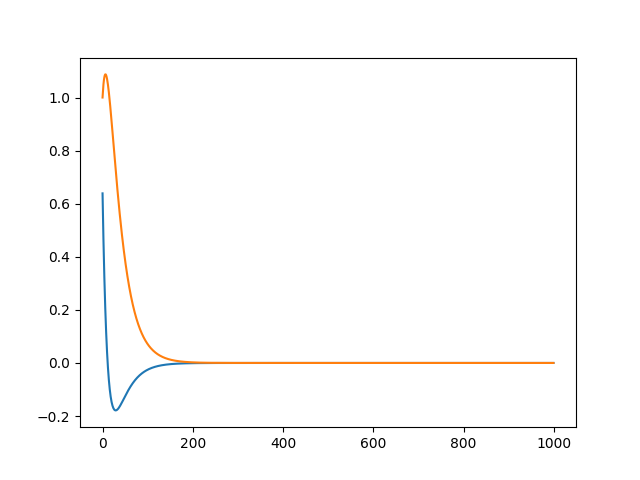

In [130]:
freq_calc = np.fft.fftfreq(time.size, d=dt)

cr = cpr.velocity[0]
Ur = cgr.velocity[0]
I1 = 0.5*np.sum(rho*(eigr.ur+eigr.uz))*dz
r1 = eigr.ur[0]
dzr1 = 1.
r2 = eigr.uz[0]
dzr2 = 1.
kn = 2*np.pi*(freq_calc)/cr
Gr1    = Mxx*np.cos(phi)**2 + (Mxy+Myx)*np.sin(phi)*np.cos(phi) + Myy*np.sin(phi)**2
Gdr1dz = Mxz*np.cos(phi) + Myz*np.sin(phi)
Gr2    = Mzx*np.cos(phi) + Mzy*np.sin(phi)
Gdr2dz = Mzz
Green = (r2/(8*cr*Ur*I1))*np.sqrt(2/(np.pi*kn*r))*np.exp(1j*(kn*r+np.pi/4.))*(kn*r1*Gr1 + 1j*dzr1*Gdr1dz + -1j*kn*r2*Gr2 + dzr2*Gdr2dz)
#Green = np.exp(1j*np.pi*kn*r)
#Green = np.exp(-((abs(freq_calc)-0.15)/0.05)**2)

Green[np.isnan(Green)] = 0.
#Green_time = np.fft.ifft(Green*np.fft.fft(stf))


plt.figure()
plt.scatter(freq_calc, abs(Green)/abs(Green).max(), color='tab:green', label='Green')
plt.scatter(freq_calc, abs(np.fft.fft(stf))/abs(np.fft.fft(stf)).max(), color='tab:orange', label='stf')
plt.plot(time, abs(np.fft.fft(stf))*abs(Green)/(abs(Green)*abs(np.fft.fft(stf))).max(), color='tab:blue', label='resulting signal')
plt.ylabel('Normalized spectral amplitude')
plt.xlabel('Frequency (Hz)')
plt.xlim([0., freq_calc.max()])
plt.legend()

plt.figure()
Green_time = np.fft.ifft(Green*abs(np.fft.fft(stf)))
plt.plot(time, np.fft.ifft(Green)/np.fft.ifft(Green).max(), color='tab:green', label='Green')
plt.plot(time, stf/stf.max(), color='tab:orange', label='stf')
plt.plot(time, Green_time/Green_time.max(), color='tab:blue', label='resulting signal')
plt.ylabel('Amplitude normalized')
plt.xlabel('Time (s)')
plt.legend()

"""
plt.figure()
kn = 2*np.pi*(freq_calc)/1.
Green = np.exp(-1j*kn*50)
Green_time = np.fft.ifft(Green*abs(np.fft.fft(stf)))
plt.plot(time, Green_time)

Green = np.exp(-1j*kn*70)
Green_time = np.fft.ifft(Green*(np.fft.fft(stf)))
plt.plot(time, Green_time)
"""

plt.figure()
plt.plot(eigr.ur)
plt.plot(eigr.uz)

In [107]:
r/cr

30.638748531312487

In [51]:
Green

array([            nan           +nanj,  1.30702314e-06-1.50926304e-05j,
       -8.87042369e-06+6.23448277e-06j,  8.65972022e-06+2.29582662e-06j,
       -3.34290637e-06-7.10335704e-06j, -2.97392349e-06+6.45172169e-06j,
        6.32770316e-06-1.73144028e-06j, -5.05390237e-06-3.49248450e-06j,
        5.47342148e-07+5.78571617e-06j,  3.88653067e-06-3.94872063e-06j,
       -5.29807279e-06-4.16475439e-07j,  2.97876673e-06+4.16748340e-06j,
        1.23238417e-06-4.80202698e-06j, -4.33953468e-06+2.08445554e-06j,
        4.27315462e-06+1.92873872e-06j, -1.24294492e-06-4.40481632e-06j,
       -2.51618487e-06+3.70362976e-06j,  4.36553532e-06-4.47976256e-07j,
       -3.09432967e-06-2.99761756e-06j, -2.98401256e-07+4.22499571e-06j,
        3.37268870e-06-2.45135295e-06j, -3.98811355e-06-9.89832054e-07j,
        1.78419995e-06+3.64013450e-06j,  1.61787205e-06-3.66165565e-06j,
       -3.79909747e-06+1.10465232e-06j,  3.25430264e-06+2.17336971e-06j,
       -4.25970431e-07-3.84992285e-06j, -2.64741051